# Water quality prediction

# Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Import Dataset

In [2]:
data = pd.read_csv('newdatset\\normprocessed.csv')
data

,Unnamed: 0.1,Unnamed: 0,Temp,D.O. (mg/l),PH,CONDUCTIVITY (umhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),TOTAL COLIFORM (MPN/100ml)Mean,wqc,wqi
0,0,0,0.700405,0.204698,0.514469,0.057502,0.099010,0.017241,0.006837,5,90.412649
1,1,8,0.591093,0.204698,0.160772,0.024558,0.138614,0.017241,0.869334,4,79.216541
2,2,10,0.635628,0.224832,0.353698,0.070680,0.148515,0.034483,0.621170,4,85.754320
3,3,11,0.639676,0.224832,0.353698,0.053010,0.099010,0.017241,0.771841,5,90.600226
4,4,13,0.623482,0.224832,0.257235,0.039832,0.148515,0.017241,0.772854,5,90.744993
...,...,...,...,...,...,...,...,...,...,...,...
4399,4399,4595,0.603239,0.171141,0.289389,0.061096,0.099010,0.017241,0.005065,5,98.223485
4400,4400,4596,0.570850,0.164430,0.482315,0.043726,0.099010,0.017241,0.003798,5,100.000000
4401,4401,4597,0.591093,0.171141,0.450161,0.090446,0.099010,0.017241,0.002532,5,100.000000
4402,4402,4598,0.607287,0.167785,0.643087,0.073675,0.217822,0.068966,0.116992,2,45.093202


In [3]:
data.drop('Unnamed: 0', axis=1, inplace = True)
data.drop('Unnamed: 0.1', axis=1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4404 entries, 0 to 4403
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Temp                              4404 non-null   float64
 1   D.O. (mg/l)                       4404 non-null   float64
 2   PH                                4404 non-null   float64
 3   CONDUCTIVITY (umhos/cm)           4404 non-null   float64
 4   B.O.D. (mg/l)                     4404 non-null   float64
 5   NITRATENAN N+ NITRITENANN (mg/l)  4404 non-null   float64
 6   TOTAL COLIFORM (MPN/100ml)Mean    4404 non-null   float64
 7   wqc                               4404 non-null   int64  
 8   wqi                               4404 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 309.8 KB


# Correlation among Features

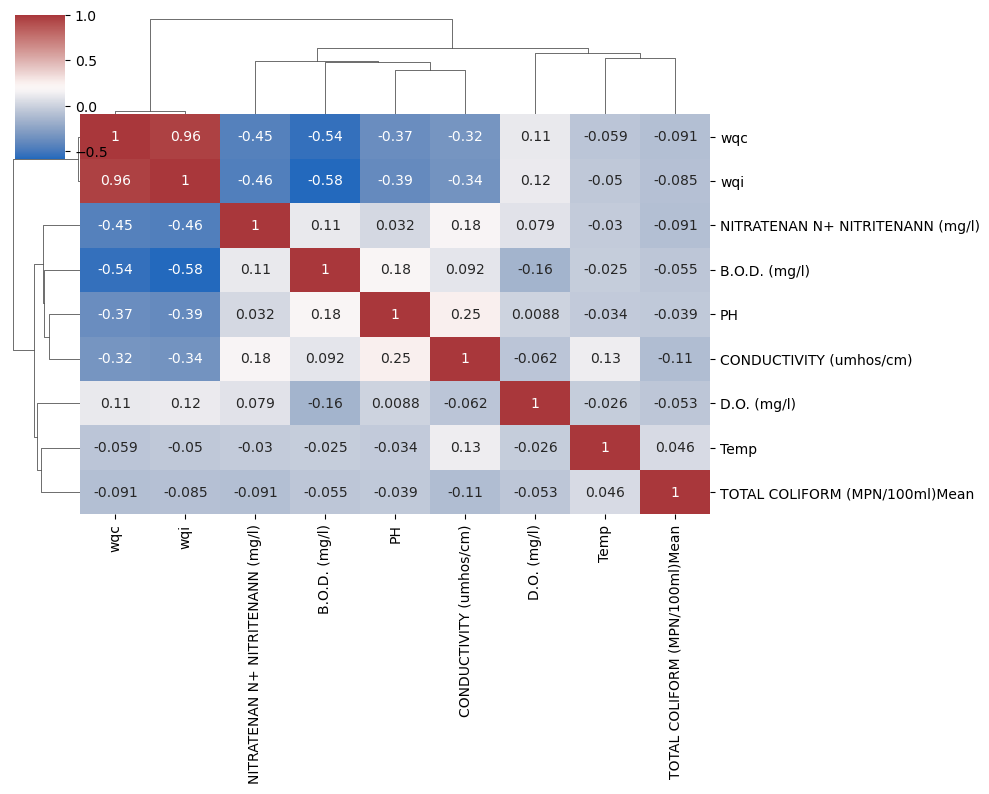

In [4]:
sns.clustermap(data.corr(), cmap="vlag", dendrogram_ratio=(0.1,0.2), annot = True, figsize=(10,8))
plt.show() 

In [5]:
data.head()

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (umhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),TOTAL COLIFORM (MPN/100ml)Mean,wqc,wqi
0,0.700405,0.204698,0.514469,0.057502,0.099010,0.017241,0.006837,5,90.412649
1,0.591093,0.204698,0.160772,0.024558,0.138614,0.017241,0.869334,4,79.216541
2,0.635628,0.224832,0.353698,0.070680,0.148515,0.034483,0.621170,4,85.754320
3,0.639676,0.224832,0.353698,0.053010,0.099010,0.017241,0.771841,5,90.600226
4,0.623482,0.224832,0.257235,0.039832,0.148515,0.017241,0.772854,5,90.744993


# Train_Test Split

In [6]:
X = data.iloc[:,0:-2]
y = data.iloc[:,-2]

In [7]:
y

0       5
1       4
2       4
3       5
4       5
       ..
4399    5
4400    5
4401    5
4402    2
4403    4
Name: wqc, Length: 4404, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (3082, 7)
X_test (1322, 7)
y_train (3082,)
y_test (1322,)


# Applying Algorithms

In [9]:
models = [("KNN",KNeighborsClassifier(5)),
          ("NVC",GaussianNB()),
          ("SVMC",SVC()),
          ("DTC",DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 30)),
          ("RFC",RandomForestClassifier(n_estimators=100))
         ]
model_name =[]
F1scorelist = []
for name, model in models:
    model.fit(X_train, y_train) # train
    model_result = model.predict(X_test) # prediction
    F1_result = f1_score(y_test, model_result,average='macro')
    
    model_name.append(name)
    F1scorelist.append(F1_result)

F1scorelist

[0.7347016763066746,
 0.4652202450976194,
 0.692860632306451,
 0.709824698187309,
 0.8857424723182632]

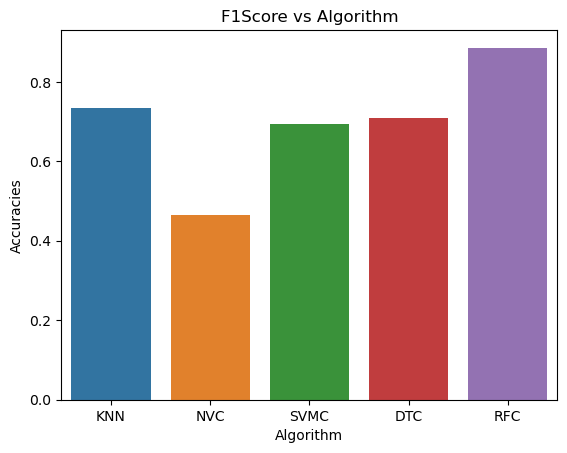

In [10]:
ax = sns.barplot(x=model_name, y=F1scorelist).set(title="F1Score vs Algorithm",xlabel="Algorithm",ylabel='Accuracies')

# Saving the best model

In [11]:
import pickle
pickle.dump(model, open('model.h5', 'wb'))

In [12]:
with open('model.pkl','wb') as file:
    pickle.dump(model,file)